## <font color=red>Programming For Data Analytics Project</font>

## GMIT GRAD. DIP. DATA ANALYTICS


### <font color=blue>PROBLEM STATEMENT</font>

Fictitious Pharmaceutical Company ‘Ollopa Pharmaceuticals’ manufactures the Active Pharmaceutical Ingredient (API) for its small molecule blockbuster drug ‘Asclepius’ by stepwise organic synthesis in a processing plant. The Manufacturing Science Group have been asked to optimise the production process to increase the yield of the active ingredient by monitoring the reaction endpoint using process analytical technology. The effect of changing process conditions and their relationship with reaction kinetics need to be monitored to achieve this. The Manufacturing Science Group have identified 4 Process Variables which they would like to investigate to see if there is any correlation between them and the reaction endpoint. The importance of identifying the reaction endpoint is critical for reactions where over reaction may lead to impurities being formed and the underreaction may lead to leftover starting materials whcih may not be purged from the process. Infra red spectroscopy is a useful process analytical technique for monitoring reactions.The reaction end point may be determined by monitoring the Infra red absorbance of the starting material.

### <font color=blue>1.CREATE THE VARIABLES</font>

**Critical Quality Attributes, (CQA's)**

|RAP(%)     |IR Peak area       | Pre-Crystallisation pH| CO2                     |
|:-------:  |:-----------------:|:--------------------: |:-----------------------:|
| 0.2-99.9% |                   | pH = 4.5-7.5          | 0-0.5%                  |

#### <font color=brown>**Variables Explained**</font>

> **RAP** The % of Active ingredient produced during the course of the process<br> *We hope to determine the effects of the following variables on its rate*

>**Reaction Rate:** Temp the reaction reaches (it is an exothermic reaction)<br>
**Pre crystallisation pH:** The pH of the batch during the reaction<br>
**CO2(%):** CO2 Levels produced during the reaction<br>

The Critical Quality Attributes are the parameters, defined by quality and agreed with the regulatory authorities, which must be adhered to in order for the active ingredient to meet predefined quality standards. A manufacturing process which deviates from these CQA's could potentially be scrapped or re-worked. Such events are outside the scope of this study so the dataset investigated in this study will be within the parameters of the above CQA's

For the purposes of creating a dataset we will investigate 100 data points of each CQA (or variable) i.e. 100 batches will be studied each of which will have data for each variable.

The effect or contribution (if any) of these variables to the batch yield will be investigated.




In [308]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline  

#number of observations

size = 100 

#Random seed set to maintain repeatability of the dataset
np.random.seed(876556788)

#List of variables
Time = np.arange(1,101) # Time in hours from start of reaction

#RAP Will be calculated as a first order kinetic curve

RxnTemp = np.round(np.random.normal(loc=20, scale=0.5, size=size),2)

pH = np.round(np.random.normal(loc=7.0, scale=0.25, size=size),2)

CO2 = np.round(np.random.normal(loc=0.25, scale=0.025, size=size),2)



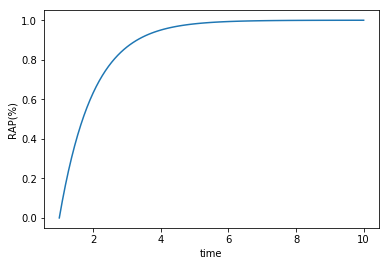

In [309]:
#Credit: Adapted from (https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations)
#Placeholder for some simple code for graphing a differential curve to be adapted in order to mimic first order kinetics

# function that returns dy/dt
def model(y, t):
    dydt = -y + 1.0
    return dydt

# initial condition
y0 = 0

# time points
t = np.linspace(1, 10, 100)

# solve ODE
y = (odeint(model,y0,t))

#RAP = pd.DataFrame(y)
# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('RAP(%)')
plt.show()

In [310]:
#Converts mulitdimensional array to single dimensional array, allowing it be beconcatenated with other random arrays
RAP = y.flatten()
RAP

array([0.        , 0.08689926, 0.16624707, 0.23869962, 0.30485605,
       0.36526357, 0.42042171, 0.47078664, 0.5167749 , 0.55876681,
       0.59710964, 0.63212054, 0.66408902, 0.69327945, 0.71993325,
       0.74427085, 0.76649353, 0.78678508, 0.8053133 , 0.82223144,
       0.83767941, 0.85178495, 0.86466474, 0.87642527, 0.88716383,
       0.89696922, 0.90592252, 0.91409779, 0.92156263, 0.92837878,
       0.93460262, 0.9402856 , 0.94547474, 0.95021295, 0.95453941,
       0.9584899 , 0.96209709, 0.96539082, 0.96839834, 0.9711445 ,
       0.97365202, 0.97594164, 0.97803229, 0.97994127, 0.98168436,
       0.98327598, 0.98472928, 0.9860563 , 0.98726799, 0.9883744 ,
       0.98938465, 0.99030712, 0.99114942, 0.99191853, 0.99262081,
       0.99326205, 0.99384758, 0.99438222, 0.9948704 , 0.99531616,
       0.99572318, 0.99609483, 0.99643419, 0.99674406, 0.997027  ,
       0.99728535, 0.99752125, 0.99773665, 0.99793334, 0.99811293,
       0.99827691, 0.99842665, 0.99856337, 0.99868821, 0.99880

In [311]:
#Output the Data as NUMPY arrays
print(('Time(hrs)=', Time), ('RAP =', RAP), ('pH =', pH), ('Reaction Temp(C) =', RxnTemp), ('CO2 =', CO2))

('Time(hrs)=', array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])) ('RAP =', array([0.        , 0.08689926, 0.16624707, 0.23869962, 0.30485605,
       0.36526357, 0.42042171, 0.47078664, 0.5167749 , 0.55876681,
       0.59710964, 0.63212054, 0.66408902, 0.69327945, 0.71993325,
       0.74427085, 0.76649353, 0.78678508, 0.8053133 , 0.82223144,
       0.83767941, 0.85178495, 0.86466474, 0.87642527, 0.88716383,
       0.89696922, 0.90592252, 0.91409779, 0.92156263, 0.92837878,
       0.934602

### <font color=blue>2. CREATE A DATAFRAME OF ALL VARIABLES</font>

**Each of the 4 numpy arrays will now be concatenated to create 1 dataframe**

[1][Column names](https://docs.python.org/3.4/tutorial/datastructures.html#dictionaries)

In [312]:

columns = {"Time(hrs)": Time, "RAP": RAP, "pH": pH, "Reaction Temp(C)": RxnTemp,  "CO2": CO2} #Add labels to the columns

Batchdf = pd.DataFrame(columns,
                  columns=["Time(hrs)", "RAP", "pH", "Reaction Temp(C)", "CO2"]) #create the dataframe

Batchdf

,Time(hrs),RAP,pH,Reaction Temp(C),CO2
0,1,0.000000,6.74,20.39,0.26
1,2,0.086899,7.45,19.64,0.22
2,3,0.166247,6.78,19.66,0.20
3,4,0.238700,7.03,20.27,0.23
4,5,0.304856,6.96,19.50,0.26
5,6,0.365264,7.05,20.63,0.23
6,7,0.420422,7.55,19.85,0.25
7,8,0.470787,7.20,19.84,0.25
8,9,0.516775,7.36,20.19,0.22
9,10,0.558767,7.18,20.87,0.23


**The batches.describe() function tabulates the summary statistics of the dataset**

In [313]:
Batchdf.describe()

,Time(hrs),RAP,pH,Reaction Temp(C),CO2
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,0.884937,6.979800,19.997600,0.248500
std,29.011492,0.217683,0.271017,0.473509,0.025756
min,1.000000,0.000000,6.360000,18.740000,0.180000
25%,25.750000,0.894518,6.810000,19.640000,0.230000
50%,50.500000,0.988880,6.980000,20.010000,0.250000
75%,75.250000,0.998828,7.152500,20.340000,0.270000
max,100.000000,0.999877,7.730000,21.230000,0.300000


### <font color=blue> 2.Create a Scatterplot Matrix of the DataFrame</font>


In [314]:
#[Credit] (https://github.com/spyder-ide/spyder/issues/7312)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #Workaround to remove 'FutureWarnings' message which appears to be a bug. 

**The following function *pairplot* using the Seaborn package, creates a scatterplot matrix of variables and includes a density estimate (in the diagonal axis). It's a useful package to visualise data with multiple variables. [Python for Data Analysis; McKinney, W.; O'Reilly; p.282]**

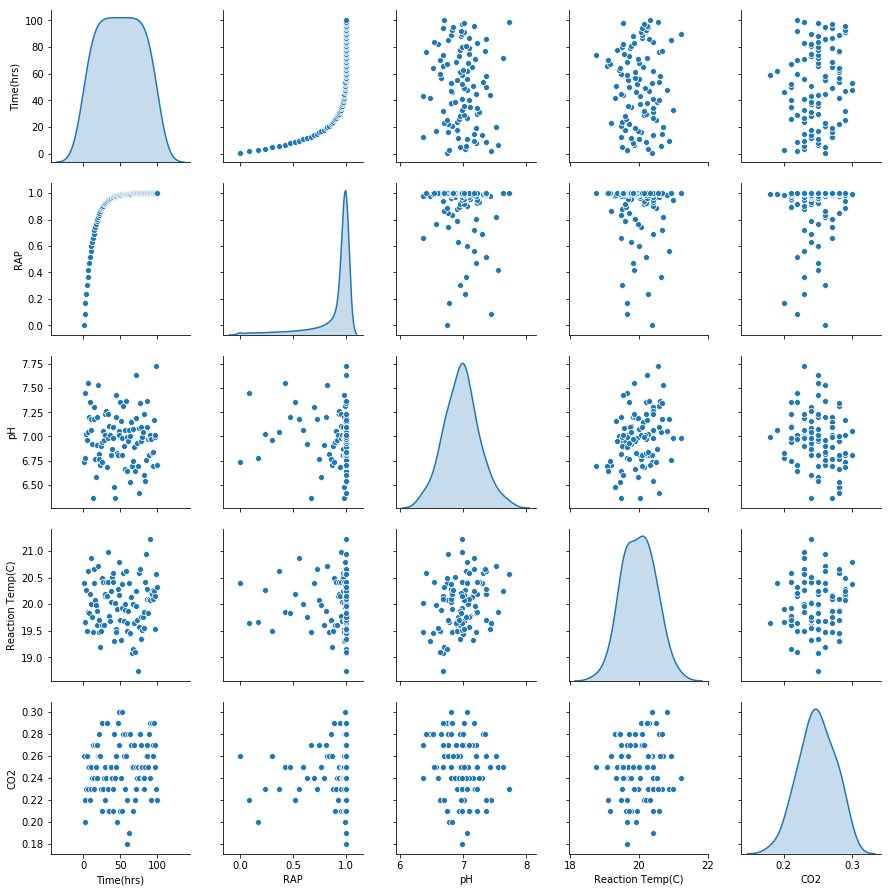

In [322]:
%matplotlib inline
sns.pairplot(Batchdf, diag_kind='kde', plot_kws={'alpha':1.0, });#scatterplots and kde matrices of all variables


**Scatter plot of pH V Yield**

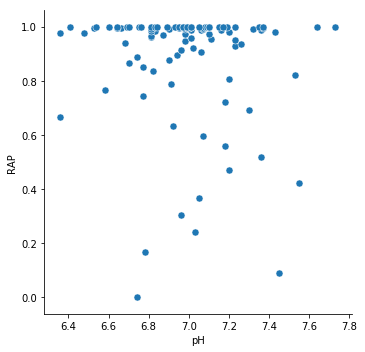

In [316]:
g = sns.FacetGrid(Batchdf, height=5, )
g.map(plt.scatter, "pH", "RAP", s=50, linewidth=.5, edgecolor="white")
g.add_legend();



**Plot The linear regression models for each variable against yield**

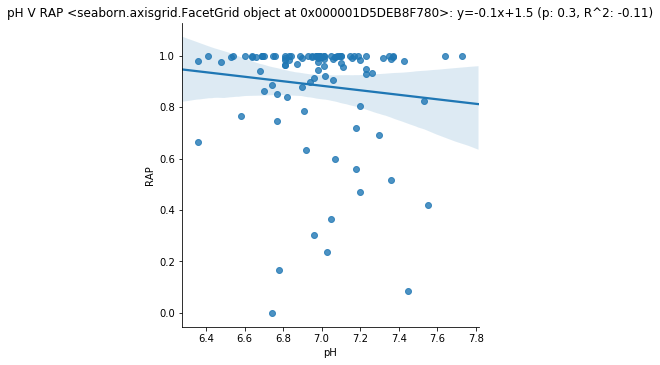

In [317]:
# get coefficients of linear fit

# Linear regression for pH V Yield
slope, intercept, r_value, p_value, std_err = stats.linregress(Batchdf['pH'],Batchdf['RAP'])

# Set line label for legend
ax = sns.lmplot(x='pH', y='RAP', data=Batchdf)

plt.title("pH V RAP {}: y={:.1f}x+{:.1f} (p: {:.1f}, R^2: {:.2f})".format(ax, slope, intercept,  p_value, r_value))
plt.show()


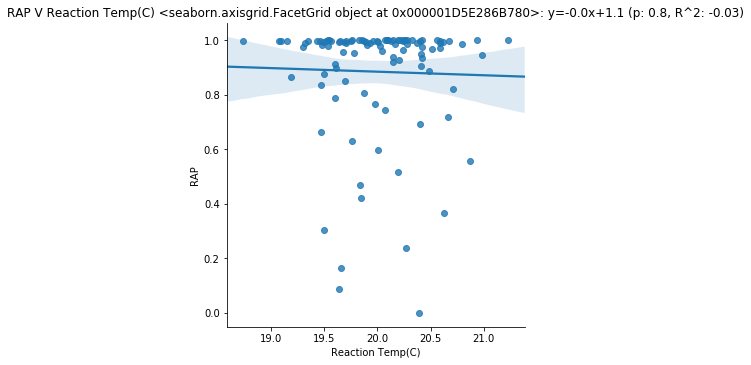

In [318]:
# get coefficients of linear fit

# Linear regression for Reaction Temp V Yield
slope, intercept, r_value, p_value, std_err = stats.linregress(Batchdf['Reaction Temp(C)'],Batchdf['RAP'])

# use line_kws to set line label for legend
ax = sns.lmplot(x='Reaction Temp(C)', y='RAP', data=Batchdf)

plt.title("RAP V Reaction Temp(C) {}: y={:.1f}x+{:.1f} (p: {:.1f}, R^2: {:.2f})".format(ax, slope, intercept,  p_value, r_value))
plt.show()

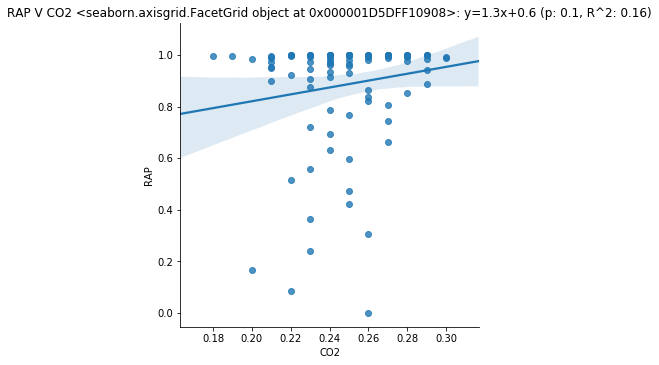

In [319]:
# get coefficients of linear fit

# Linear regression for IPC Result(%) V Yield
slope, intercept, r_value, p_value, std_err = stats.linregress(Batchdf['CO2'],Batchdf['RAP'])

# use line_kws to set line label for legend
ax = sns.lmplot(x='CO2', y='RAP', data=Batchdf)

plt.title("RAP V CO2 {}: y={:.1f}x+{:.1f} (p: {:.1f}, R^2: {:.2f})".format(ax, slope, intercept,  p_value, r_value))
plt.show()